In [2]:
import pandas as pd
from pathlib import Path

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns

In [26]:
df_spss = pd.read_spss("..\data\DIALECT.sav")

In [27]:
df_spss

,Subjectnr,Geslacht,Leeftijd_poli1,Polidatum1,Polijaar_1,Polibezoek,Arts,Freq_arts,Freq_vp,Freq_tot,...,SumOfvite,SumOfrae,SumOffole,SumOfzink,SumOfdpa,SumOfarachidonz,SumOffolaat,SumOfnico,SumOfwater,SumOfnatrium
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,man,65.0,2009-08-31,2009.0,Eerste bezoek,Schot,4.0,0.0,4.0,...,13.267616,602.510257,173.289978,9.203426,0.000000,0.034463,173.289978,16.178387,1591.211480,2607.443336
3,2.0,man,61.0,2009-08-31,2009.0,Eerste bezoek,Oving,1.0,4.0,5.0,...,10.662237,645.575531,133.897548,7.454809,0.000010,0.047574,133.897548,16.796363,2216.603139,1891.477166
4,3.0,man,56.0,2009-08-31,2009.0,Eerste bezoek,Veneman,0.0,0.0,0.0,...,29.996976,1207.776682,209.312323,13.193616,0.000494,0.031634,205.339877,22.143815,2758.233627,3351.952037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,732.0,vrouw,74.0,2019-05-22,2019.0,Eerste bezoek,van berkum,3.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,733.0,vrouw,28.0,2019-04-26,2019.0,Eerste bezoek,Visser,7.0,24.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,734.0,man,65.0,2019-05-08,2019.0,Eerste bezoek,de Vries,5.0,8.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,736.0,man,77.0,2019-05-22,2019.0,Eerste bezoek,Laverman,4.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# De eerste twee patienten hebben geen waarden ingevuld, dus kunnen verwijderd worden
# Voor het vinden van argumenten bij een functie:
# df_spss.drop?
df_spss.drop([0, 1], inplace=True)

In [31]:
df_spss

,Subjectnr,Geslacht,Leeftijd_poli1,Polidatum1,Polijaar_1,Polibezoek,Arts,Freq_arts,Freq_vp,Freq_tot,...,SumOfvite,SumOfrae,SumOffole,SumOfzink,SumOfdpa,SumOfarachidonz,SumOffolaat,SumOfnico,SumOfwater,SumOfnatrium
2,1.0,man,65.0,2009-08-31,2009.0,Eerste bezoek,Schot,4.0,0.0,4.0,...,13.267616,602.510257,173.289978,9.203426,0.000000,0.034463,173.289978,16.178387,1591.211480,2607.443336
3,2.0,man,61.0,2009-08-31,2009.0,Eerste bezoek,Oving,1.0,4.0,5.0,...,10.662237,645.575531,133.897548,7.454809,0.000010,0.047574,133.897548,16.796363,2216.603139,1891.477166
4,3.0,man,56.0,2009-08-31,2009.0,Eerste bezoek,Veneman,0.0,0.0,0.0,...,29.996976,1207.776682,209.312323,13.193616,0.000494,0.031634,205.339877,22.143815,2758.233627,3351.952037
5,4.0,vrouw,51.0,2009-08-31,2009.0,Eerste bezoek,Ouwehand,1.0,4.0,5.0,...,4.281328,218.128055,90.296190,5.820861,0.000057,0.039529,90.296190,5.644264,673.484131,1646.457431
6,5.0,vrouw,60.0,2009-08-31,2009.0,Eerste bezoek,van Zanten,1.0,4.0,5.0,...,16.653028,1482.346823,207.709797,10.275772,0.000243,0.079542,207.709797,18.294950,2028.428955,2972.889884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,732.0,vrouw,74.0,2019-05-22,2019.0,Eerste bezoek,van berkum,3.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,733.0,vrouw,28.0,2019-04-26,2019.0,Eerste bezoek,Visser,7.0,24.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,734.0,man,65.0,2019-05-08,2019.0,Eerste bezoek,de Vries,5.0,8.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,736.0,man,77.0,2019-05-22,2019.0,Eerste bezoek,Laverman,4.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
def read_recursively(path: str) -> list:
    """Read the data for each one of the folder """
    paths = list(Path(path).iterdir())
    paths.sort()
    return {k: df for k, df in [process_folder(p) for p in paths]}


def process_folder(dir: Path) -> list:
    """Read the files from each folder"""
    path_name = dir / f"{dir.name}-steps.xlsx"
    if path_name.exists():
        df = pd.read_excel(path_name)
    else:
        df = None
    return dir.name, df

In [8]:
time_series = read_recursively("..\data\Diabetes ZGT data")
time_series.keys()

dict_keys(['1001', '1002', '353', '364', '369', '371', '380', '458', '466', '470', '471', '473', '476', '477', '479', '480', '482', '483', '485', '486', '487', '488', '489', '490', '491', '497', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '519', '520', '521', '522', '523', '524', '525', '527', '529', '530', '531', '532', '536', '537', '538', '540', '541', '542', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', 

In [9]:
df_353 = time_series['353']
df_353
df_353.columns

Index(['time', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20'],
      dtype='object')

# Features

* [x] Geslacht
* [x] Leeftijd_poli1
* [X] Freq_tot
* [X] DMduur = polijaar_1 – Dmaanvang
* [X] Pack_years
* [X] Alcoholgebruik1EHpermaand
* [ ] Lengte_poli1
* [ ] Gewicht_poli1
* [ ] Buikomvang_1
* [ ] Heupomvang_1
* [ ] SBP_poli1
* [ ] DBP_poli1
* [ ] Pols
* [ ] MAP_poli1
* [ ] Microvas_total (INPUT OR OUTPUT)
* [ ] Macrovasculaire_ziekten (INPUT OR OUTPUT)
* [ ] SerumHbA1c_1 (INPUT OR OUTPUT)
* [ ] Serum_cholesterol_1
* [ ] Total_number_drugs
* [ ] Insulin_bin
* [ ] EH_insuline

# Clean the dataframes

## 3.1 Geslacht

In [34]:
df_ml = pd.DataFrame()
df_ml["Geslacht"] = df_spss["Geslacht"].apply(lambda x: 0.0 if x == "man" else 1.0)
df_ml

,Geslacht
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
...,...
669,1.0
670,1.0
671,0.0
672,0.0


## 3.2 Leeftijd_poli1

In [39]:
df_spss["Leeftijd_poli1"].isna().any()

False

In [40]:
df_ml["Leeftijd_poli1"] = df_spss["Leeftijd_poli1"]
df_ml

,Geslacht,Leeftijd_poli1
2,0.0,65.0
3,0.0,61.0
4,0.0,56.0
5,1.0,51.0
6,1.0,60.0
...,...,...
669,1.0,74.0
670,1.0,28.0
671,0.0,65.0
672,0.0,77.0


## 3.3 Freq_tot

In [58]:
df_spss["Freq_tot"].isna().any()

True

In [59]:
freq_tot = df_spss["Freq_tot"]
freq_tot[freq_tot.isna()]

171   NaN
501   NaN
Name: Freq_tot, dtype: float64

In [61]:
# Berekening van de gemiddelde waarde van freq_tot om deze op de NaN posities in te vullen
mean_value = freq_tot[~freq_tot.isna()].mean()
mean_value

5.325373134328358

In [74]:
df_ml["Freq_tot"] = df_spss["Freq_tot"].copy()
df_ml["Freq_tot"][freq_tot.isna()] = mean_value

C:\Users\dHollosyW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
df_ml["Freq_tot"].isna().any()

False

## 3.4 DMduur = Polijaar_1 – DMaanvang

In [77]:
df_spss["Polijaar_1"].isna().any()

False

In [78]:
df_spss["DMaanvang"].isna().any()

False

In [79]:
df_ml["DMduur"]=df_spss["Polijaar_1"]-df_spss["DMaanvang"]

In [80]:
df_ml

,Geslacht,Leeftijd_poli1,Freq_tot,DMduur
2,0.0,65.0,4.0,9.0
3,0.0,61.0,5.0,24.0
4,0.0,56.0,0.0,14.0
5,1.0,51.0,5.0,3.0
6,1.0,60.0,5.0,13.0
...,...,...,...,...
669,1.0,74.0,4.0,39.0
670,1.0,28.0,31.0,5.0
671,0.0,65.0,13.0,28.0
672,0.0,77.0,6.0,37.0


## 3.5 Pack_years

In [81]:
df_spss["Pack_years"].isna().any()

True

In [88]:
df_spss["Pack_years"].isna().sum() # number of nan in the column

43

In [89]:
df_ml["Pack_years"] = df_spss["Pack_years"].fillna(df_spss['Pack_years'].mean())

In [86]:
df_spss["Pack_years"]

2      109.0
3       63.0
4       42.0
5       77.0
6        1.0
       ...  
669      4.0
670      0.0
671     12.0
672      0.0
673     12.0
Name: Pack_years, Length: 672, dtype: float64

## 3.6 Alcoholgebruik1EHpermaand

In [90]:
df_spss["Alcoholgebruik1EHpermaand"].isna().sum()

30

## 3.7 Gewicht_poli1


In [94]:
df_spss["Gewicht_poli1"].isna().sum()

2

## 3.8 Buikomvang_1

In [95]:
df_spss["Buikomvang_1"].isna().sum()

8

## 3.9 Heupomvang_1


In [97]:
df_spss["Heupomvang_1"].isna().sum()

8

## 3.10 SBP


In [98]:
df_spss["SBP_poli1"].isna().sum()

233

In [116]:
df_ml["SBP"] = df_spss[['SBP1', 'SBP2', 'SBP3']].mean(axis=1)
df_ml["SBP"].isna().sum()


112

In [117]:
df_ml["SBP"].mean()

133.24583333333322

In [139]:
mean_value = df_ml["SBP"][~df_ml["SBP"].isna()].mean()
mean_value

133.24583333333322

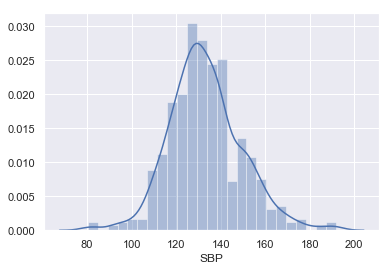

In [132]:
sns.set(color_codes=True)
sns.distplot(df_ml["SBP"][-df_ml["SBP"].isna()])

In [140]:
mean_value = df_ml["SBP"][~df_ml["SBP"].isna()].mean()
df_ml["SBP"][df_ml["SBP"].isna()] = mean_value

C:\Users\dHollosyW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
df_ml["SBP"].isna().sum()

0

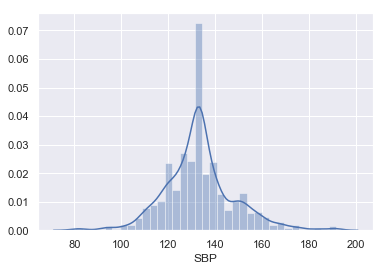

In [148]:
sns.distplot(df_ml["SBP"])

## 3.11 DBP

In [99]:
df_spss["DBP_poli1"].isna().sum()

233

In [118]:
df_ml["DBP"] = df_spss[['DBP1', 'DBP2', 'DBP3']].mean(axis=1)
df_ml["DBP"].isna().sum()


111

In [119]:
df_ml["DBP"].mean()

73.89126559714789

In [143]:
mean_value = df_ml["DBP"][~df_ml["DBP"].isna()].mean()
mean_value

73.89126559714789

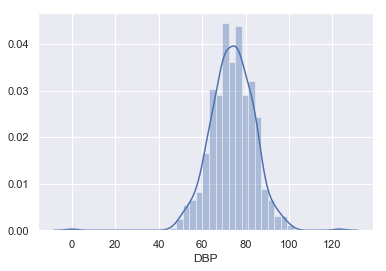

In [133]:
sns.distplot(df_ml["DBP"][-df_ml["DBP"].isna()])

In [144]:
df_ml["DBP"] = df_ml["DBP"].copy()
mean_value = df_ml["DBP"][~df_ml["DBP"].isna()].mean()
df_ml["DBP"][df_ml["DBP"].isna()] = mean_value

C:\Users\dHollosyW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [145]:
df_ml["DBP"].isna().sum()

0

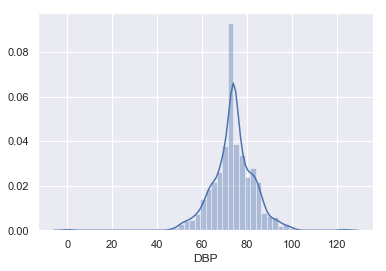

In [147]:
sns.distplot(df_ml["DBP"])

## 3.12 Pols_poli1


In [101]:
df_spss["Pols_poli1"].isna().sum()

11

## 3.13 MAP_poli1


In [102]:
df_spss["MAP_poli1"].isna().sum()
# Nemen we niet mee ivm DBP en SBP

238

## 3.14 Microvas_total (INPUT OR OUTPUT)


In [103]:
df_spss["Microvas_total"].isna().sum()

4

## 3.15 Macrovasculaire_ziekten (INPUT OR OUTPUT)


In [104]:
df_spss["Macrovasculaire_ziekten"].isna().sum()

0

## 3.16 SerumHbA1c_1 (INPUT OR OUTPUT)


In [105]:
df_spss["SerumHbA1c_1"].isna().sum()

2

## 3.17 Serum_cholesterol_1


In [106]:
df_spss["Serum_cholesterol_1"].isna().sum()

3

## 3.18 Total_number_drugs


In [107]:
df_spss["Total_number_drugs"].isna().sum()

85

## 3.19 insulin_bin


In [109]:
df_spss["insulin_bin"].isna().sum()
# Nemen we niet mee, want eenheden zeggen meer dan insuline_bin. Maar beide features zijn wel afhankelijk van elkaar

164

## 3.20 EH_insuline

In [110]:
df_spss["EH_insuline"].isna().sum()

638

171   NaN
501   NaN
Name: Freq_tot, dtype: float64

5.325373134328358